# Importar

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial.distance import euclidean
import os

# Datos

In [2]:
# Cargar el dataset preparado
df = pd.read_csv('../Data/dataset_preparado.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
# Verificar si la columna 'client' ya existe en el DataFrame
if 'client' not in df.columns:
    # Si no existe, crearla con identificadores únicos para cada registro
    df['client'] = ['Client' + str(i) for i in range(1, len(df) + 1)]
else:
    # Si ya existe, no hacer nada (o imprimir un mensaje indicándolo)
    print("La columna 'client' ya existe en el DataFrame.")


In [4]:
#si se crean columnas en vez de filas ejecutar este codigo
# Listar todas las columnas que NO queremos eliminar (las originales de tu DataFrame)
#original_columns = [col for col in df.columns if not col.startswith('client')]

#Restaurar el DataFrame a solo estas columnas originales
#df = df[original_columns]


In [5]:
# Verificar y manejar valores faltantes
df.isnull().sum()
df.fillna(0, inplace=True)

In [6]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Asegurar que 'client' no sea afectado por get_dummies
if 'client' not in df.columns:
    df['client'] = ['Client' + str(i) for i in range(1, len(df) + 1)]

# Seleccionar columnas no categóricas (excluyendo 'client' para evitar su codificación)
non_categorical_columns = df.columns.difference(categorical_columns + ['client'])

# Aplicar pd.get_dummies() solo a las columnas categóricas
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenar el resultado con las columnas no categóricas y la columna 'client'
df = pd.concat([df[non_categorical_columns], df_dummies, df[['client']]], axis=1)


In [7]:
# Convertir columnas de tipo bool a int
df = df*1
df

,age,balance,campaign,day,deposit,duration,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,client
0,59,2343,1,5,yes,1042,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,Client1
1,56,45,1,5,yes,1467,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,Client2
2,41,1270,1,5,yes,1389,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,Client3
3,55,2476,1,5,yes,579,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,Client4
4,54,184,2,5,yes,673,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,Client5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,20,no,257,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,Client11158
11158,39,733,4,16,no,83,-1,0,0,0,...,1,0,0,0,0,0,0,0,1,Client11159
11159,32,29,2,19,no,156,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,Client11160
11160,43,0,2,8,no,9,172,5,0,0,...,0,0,1,0,0,0,0,0,0,Client11161


In [8]:
df.dtypes

age                     int64
balance                 int64
campaign                int64
day                     int64
deposit                object
duration                int64
pdays                   int64
previous                int64
job_blue-collar         int64
job_entrepreneur        int64
job_housemaid           int64
job_management          int64
job_retired             int64
job_self-employed       int64
job_services            int64
job_student             int64
job_technician          int64
job_unemployed          int64
job_unknown             int64
marital_married         int64
marital_single          int64
education_secondary     int64
education_tertiary      int64
education_unknown       int64
default_yes             int64
housing_yes             int64
loan_yes                int64
contact_telephone       int64
contact_unknown         int64
month_aug               int64
month_dec               int64
month_feb               int64
month_jan               int64
month_jul 

# Selección de Datos

In [9]:
# Excluir 'deposit' para la segmentación
features_df = df.drop(['deposit', 'client'], axis=1)

# Normalizar los Datos

In [10]:
# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
features_scaled = scaler.fit_transform(features_df)


# Determinación del Número Óptimo de Clusters

In [11]:
# Suma de cuadrados dentro del cluster (WCSS)
# Calcula WCSS para diferentes números de clusters
wcss = []
for i in range(1, 11):  # Probamos desde 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)



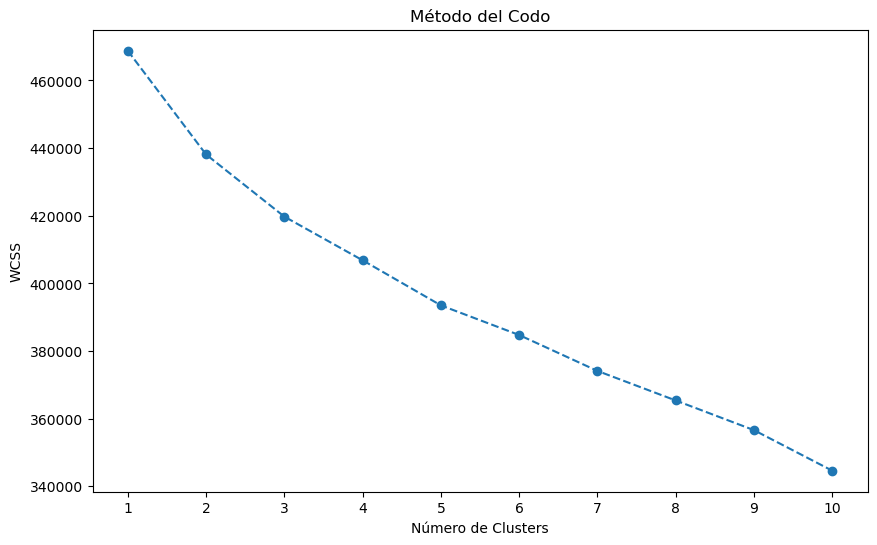

In [12]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [13]:
# Calcula la derivada del WCSS (la tasa de cambio en WCSS) para identificar el "codo"
derivadas_wcss = np.diff(wcss) * -1  # Multiplicamos por -1 para obtener valores positivos, ya que WCSS decrece

In [14]:
# Identifica el número óptimo de clusters como el punto antes del cual la derivada cambia más significativamente
# Esto es, buscamos el último "gran salto" en reducción de WCSS antes de que los cambios se vuelvan menores
n_clusters_optimo = np.argmax(derivadas_wcss) + 2  # +2 porque np.diff reduce el tamaño del array en 1 y estamos buscando el punto de inflexión después del cambio

print(f"El número óptimo sugerido de clusters es: {n_clusters_optimo}")


El número óptimo sugerido de clusters es: 2


# Aplicación del Clustering K-Means con el Número Óptimo de Clusters

In [15]:
# Utilizar el número óptimo de clusters identificado
kmeans_optimo = KMeans(n_clusters=n_clusters_optimo, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans_optimo.fit_predict(features_scaled)

In [16]:
# Añadir las etiquetas de cluster al dataframe para análisis
df['Cluster'] = cluster_labels

## Análisis de los Segmentos de Clientes

In [17]:
# Calcular estadísticas descriptivas para cada cluster
for i in range(n_clusters_optimo):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data.describe().transpose())



Cluster 0:
                      count         mean          std     min    25%    50%  \
age                  2829.0    41.802404    12.985855    18.0   32.0   38.0   
balance              2829.0  1783.396960  3696.308303 -1137.0  219.0  722.0   
campaign             2829.0     1.896430     1.318814     1.0    1.0    1.0   
day                  2829.0    14.456345     8.245479     1.0    8.0   14.0   
duration             2829.0   345.413927   279.335318     4.0  162.0  264.0   
pdays                2829.0   205.336161   122.001016     1.0   98.0  182.0   
previous             2829.0     3.280665     3.563088     1.0    1.0    2.0   
job_blue-collar      2829.0     0.130435     0.336841     0.0    0.0    0.0   
job_entrepreneur     2829.0     0.018381     0.134349     0.0    0.0    0.0   
job_housemaid        2829.0     0.018381     0.134349     0.0    0.0    0.0   
job_management       2829.0     0.255921     0.436455     0.0    0.0    0.0   
job_retired          2829.0     0.086250

In [18]:
# Obtener el número de clusters únicos
n_clusters = df['Cluster'].nunique()
n_clusters

2

In [19]:
# Calcular estadísticas descriptivas para cada cluster
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data.describe().transpose())



Cluster 0:
                      count         mean          std     min    25%    50%  \
age                  2829.0    41.802404    12.985855    18.0   32.0   38.0   
balance              2829.0  1783.396960  3696.308303 -1137.0  219.0  722.0   
campaign             2829.0     1.896430     1.318814     1.0    1.0    1.0   
day                  2829.0    14.456345     8.245479     1.0    8.0   14.0   
duration             2829.0   345.413927   279.335318     4.0  162.0  264.0   
pdays                2829.0   205.336161   122.001016     1.0   98.0  182.0   
previous             2829.0     3.280665     3.563088     1.0    1.0    2.0   
job_blue-collar      2829.0     0.130435     0.336841     0.0    0.0    0.0   
job_entrepreneur     2829.0     0.018381     0.134349     0.0    0.0    0.0   
job_housemaid        2829.0     0.018381     0.134349     0.0    0.0    0.0   
job_management       2829.0     0.255921     0.436455     0.0    0.0    0.0   
job_retired          2829.0     0.086250

In [20]:
# Seleccionar algunas características clave para comparar
selected_features = ['age', 'balance', 'duration', 'pdays', 'previous', 'campaign']

# Comparación de métricas entre clusters para características seleccionadas
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[selected_features].mean())




Cluster 0:
age           41.802404
balance     1783.396960
duration     345.413927
pdays        205.336161
previous       3.280665
campaign       1.896430
dtype: float64

Cluster 1:
age           41.038282
balance     1442.015721
duration     381.017521
pdays         -0.953558
previous       0.001440
campaign       2.716189
dtype: float64


In [21]:
def analyze_clusters(df, cluster_column):
    cluster_insights = {}

    for i in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == i]
        insights = cluster_data.describe().loc[['mean', '50%', 'min', 'max']]
        cluster_insights[i] = insights

    return cluster_insights

# Analizar clusters
cluster_insights = analyze_clusters(df, 'Cluster')

# Mostrar resultados
for cluster, insights in cluster_insights.items():
    print(f"\nCluster {cluster} Insights:")
    print(insights)




Cluster 1 Insights:
            age       balance   campaign        day     duration       pdays  \
mean  41.038282   1442.015721   2.716189  16.066003   381.017521   -0.953558   
50%   39.000000    497.000000   2.000000  16.000000   250.000000   -1.000000   
min   18.000000  -6847.000000   1.000000   1.000000     2.000000   -1.000000   
max   95.000000  66653.000000  63.000000  31.000000  3881.000000  188.000000   

      previous  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
mean   0.00144         0.189008          0.033121       0.026641  ...   
50%    0.00000         0.000000          0.000000       0.000000  ...   
min    0.00000         0.000000          0.000000       0.000000  ...   
max    2.00000         1.000000          1.000000       1.000000  ...   

      month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
mean   0.125405   0.021121   0.265091   0.075723   0.023521   0.015481   
50%    0.000000   0.000000   0.000000   0.000000   0.000000   0.

In [22]:
# Añadir un comentario dinámico al modelo
comentario = """
Este modelo de clustering ha sido desarrollado para identificar segmentos de clientes basados en diversas características demográficas y de comportamiento. Se han utilizado técnicas de clustering para agrupar a los clientes en dos clusters distintos. 
El Cluster 0 representa a un grupo de clientes con una edad promedio de {mean_age_cluster0} años, un balance promedio de {mean_balance_cluster0} euros, una duración promedio de {mean_duration_cluster0} segundos en las llamadas, etc.
El Cluster 1, por otro lado, tiene una edad promedio de {mean_age_cluster1} años, un balance promedio de {mean_balance_cluster1} euros, una duración promedio de {mean_duration_cluster1} segundos en las llamadas, etc.
Se han observado diferencias significativas entre estos dos clusters en términos de sus características. 
Se ha actualizado la base de datos y se ha guardado como 'dataset_clusterizado.csv' para futuros análisis.
"""

In [23]:
# Calcular estadísticas descriptivas para cada cluster
cluster_stats = df.groupby('Cluster').describe()

In [24]:
# Obtener los valores específicos para completar el comentario
mean_age_cluster0 = cluster_stats.loc[0, ('age', 'mean')]
mean_balance_cluster0 = cluster_stats.loc[0, ('balance', 'mean')]
mean_duration_cluster0 = cluster_stats.loc[0, ('duration', 'mean')]
mean_age_cluster1 = cluster_stats.loc[1, ('age', 'mean')]
mean_balance_cluster1 = cluster_stats.loc[1, ('balance', 'mean')]
mean_duration_cluster1 = cluster_stats.loc[1, ('duration', 'mean')]

In [25]:
# Actualizar el comentario con los valores calculados
comentario = comentario.format(mean_age_cluster0=mean_age_cluster0, mean_balance_cluster0=mean_balance_cluster0,
                                mean_duration_cluster0=mean_duration_cluster0, mean_age_cluster1=mean_age_cluster1,
                                mean_balance_cluster1=mean_balance_cluster1, mean_duration_cluster1=mean_duration_cluster1)


In [26]:
# Imprimir el comentario
print(comentario)


Este modelo de clustering ha sido desarrollado para identificar segmentos de clientes basados en diversas características demográficas y de comportamiento. Se han utilizado técnicas de clustering para agrupar a los clientes en dos clusters distintos. 
El Cluster 0 representa a un grupo de clientes con una edad promedio de 41.80240367621067 años, un balance promedio de 1783.3969600565572 euros, una duración promedio de 345.4139271827501 segundos en las llamadas, etc.
El Cluster 1, por otro lado, tiene una edad promedio de 41.03828153126125 años, un balance promedio de 1442.0157206288252 euros, una duración promedio de 381.017520700828 segundos en las llamadas, etc.
Se han observado diferencias significativas entre estos dos clusters en términos de sus características. 
Se ha actualizado la base de datos y se ha guardado como 'dataset_clusterizado.csv' para futuros análisis.



In [27]:
# Guardar la base de datos como dataset_clusterizado.csv
df.to_csv('../Data/dataset_clusterizado.csv', index=False)

# Descargar la base de datos
if os.path.exists('../Data/dataset_clusterizado.csv'):
    os.remove('../Data/dataset_clusterizado.csv')
df.to_csv('../Data/dataset_clusterizado.csv', index=False)